<a href="https://colab.research.google.com/github/anmolshinde10/Linear-Assignment/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [2]:

def SVD (B, k):
    U, Sigma, V = np.linalg.svd(B.copy())
    compressed = np.matrix(U[:,:k]) * np.diag(Sigma[:k]) * np.matrix(V[:k,:])
    return compressed

In [3]:
def compression_rgb(A):
    k = 100 #this is the number of singular values, change them to see how sharpness is affected (Use 1<=k<=421)
    B = A.copy()
    img_layers = np.zeros(B.shape)
    for i in range(3):
        img_layers[:,:,i] = SVD(B[:,:,i],k)
    plt.figure(figsize=(9,6))
    plt.imshow(img_layers.astype(np.uint8))
    result = Image.fromarray((img_layers).astype(np.uint8))
    result.save('compressed.jpg')
    size = float(os.path.getsize('./compressed.jpg'))/1000
    plt.title("k = {} & {} Kb".format(k,size))
    plt.show()

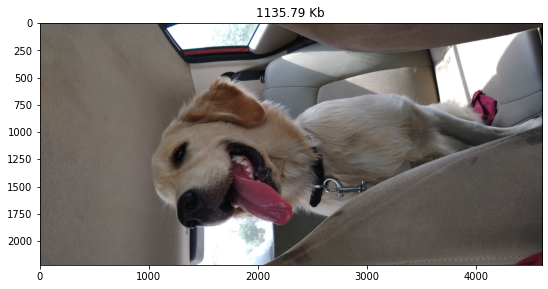

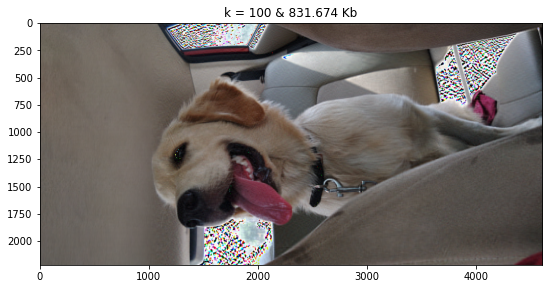

In [4]:
path = '/content/IMG_20210409_125538.jpg'
img = Image.open(path)
Matrix = np.asarray(img)
s = float(os.path.getsize(path))/1000

plt.figure(figsize=(9, 6))
plt.imshow(img)
plt.title("{:.2f} Kb".format(s))
plt.show()

compression_rgb(Matrix)